# Welcome to my notebook!

Default code from Kaggle Notebook:

In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
   
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

   

## Displaying some important libraries:

In [65]:
# import tensorflow as tf
# print("Tensorflow:", tf.__version__)

# import kerastuner as kt
# print("kerastuner:", kt.__version__)

# import keras_tuner as kt2
# print("keras_tuner:", kt2.__version__)

# import platform
# print("Python:", platform.python_version())

# import numpy as np
# print("numpy:", np.__version__)

# import pandas as pd
# print("pandas:", pd.__version__)

# import sklearn
# print("sklearn version:", sklearn.__version__)

# import sklearn
# print("sklearn path:", sklearn.__path__)

# import matplotlib
# print("matplotlib:", matplotlib.__version__)

# import seaborn as sns
# print("seaborn:", sns.__version__)

# # On WSL

# # 2024-01-30 11:17:52.768682: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
# # 2024-01-30 11:17:53.149956: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
# # 2024-01-30 11:17:53.150001: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
# # 2024-01-30 11:17:53.210606: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
# # 2024-01-30 11:17:53.339576: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
# # To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
# # 2024-01-30 11:17:54.568146: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
# # Tensorflow: 2.15.0
# # /tmp/ipykernel_3814/2917868046.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
# #   import kerastuner as kt
# # kerastuner: 1.0.5
# # keras_tuner: 1.3.5
# # Python: 3.10.12
# # numpy: 1.24.3
# # pandas: 2.1.4
# # sklearn version: 1.2.2
# # sklearn path: ['/home/michaelye22/.local/lib/python3.10/site-packages/sklearn']
# # matplotlib: 3.8.2
# # seaborn: 0.13.0



## Set Global random seed to make sure we can replicate any model that we create (no randomness)

In [66]:
import random
import tensorflow as tf
import numpy as np
import os



np.random.seed(42)
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

os.environ['TF_DETERMINISTIC_OPS'] = '1'

# **Data Preprocessing:**

### Loading the training and testing data

train_values are the features (X), and train_labels is the target/label (Y)

In [67]:
train_X = pd.read_csv("train_features.csv")
train_y = pd.read_csv("train_labels.csv")

test_values = pd.read_csv("test_features.csv")

# print("train labels:\n", train_Y.head())

# print("train values:\n", train_X.head())
      
# print("test_values:\n", test_values.head())

### Check to see if there are any missing values in the data. If so, we have to do imputation

In [68]:
missing_train_X = train_X.isnull().sum().sum()
print("Number of missing values in train_X:", missing_train_X)

missing_train_y = train_y.isnull().sum().sum()
print("Number of missing values in train_Y:", missing_train_y)

missing_test_values = test_values.isnull().sum().sum()
print("Number of missing values in test_values:", missing_test_values )

Number of missing values in train_X: 0
Number of missing values in train_Y: 0
Number of missing values in test_values: 0


Since we have 0 missing values in each dataframe, we don't have to do imputation!

## Stratified train_test split

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the datasets

train_features = train_X
train_labels = train_y

# Merge the datasets on 'id'
merged_data = pd.merge(train_features, train_labels, on='id')

# Identifying the animal present in each image and creating a combined category
animal_columns = ['antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog', 'leopard', 'monkey_prosimian', 'rodent']
merged_data['animal'] = merged_data[animal_columns].idxmax(axis=1)
merged_data['site_animal'] = merged_data['site'] + '_' + merged_data['animal']

# Checking the number of instances for each site_animal combination
combination_counts = merged_data['site_animal'].value_counts()
rare_combinations = combination_counts[combination_counts < 5]

# Separating the dataset into common and rare combinations
common_combinations = merged_data[~merged_data['site_animal'].isin(rare_combinations.index)]
rare_combinations_data = merged_data[merged_data['site_animal'].isin(rare_combinations.index)]



# Stratified split for common combinations into train and temp sets
common_train_set, common_temp_set = train_test_split(
    common_combinations, test_size=0.3, stratify=common_combinations['site_animal'], random_state=42)

# Check if each class has at least two instances
class_counts = common_temp_set['site_animal'].value_counts()
single_instance_classes = class_counts[class_counts < 2]

# Separate single instance classes
single_instance_data = common_temp_set[common_temp_set['site_animal'].isin(single_instance_classes.index)]
common_temp_set = common_temp_set[~common_temp_set['site_animal'].isin(single_instance_classes.index)]

# Stratified split for common combinations into validation and test sets
common_val_set, common_test_set = train_test_split(
    common_temp_set, test_size=0.5, stratify=common_temp_set['site_animal'], random_state=42)

# Add single instance classes to the training set
common_train_set = pd.concat([common_train_set, single_instance_data])



# Randomly splitting rare combinations into train and temp sets
total_samples = rare_combinations_data.shape[0]
train_samples = int(np.round(total_samples * 0.7))
rare_train_set = rare_combinations_data.sample(n=train_samples, random_state=42)
rare_temp_set = rare_combinations_data.drop(rare_train_set.index)

# Randomly splitting rare combinations into validation and test sets
total_samples = rare_temp_set.shape[0]
val_samples = int(np.round(total_samples * 0.5))
rare_val_set = rare_temp_set.sample(n=val_samples, random_state=42)
rare_test_set = rare_temp_set.drop(rare_val_set.index)

# Combining the splits into final train, validation and test sets
final_train_set = pd.concat([common_train_set, rare_train_set])
final_val_set = pd.concat([common_val_set, rare_val_set])
final_test_set = pd.concat([common_test_set, rare_test_set])

# Optional: Verifying the final distribution (can be commented out for large datasets)
final_train_distribution = final_train_set['site_animal'].value_counts(normalize=True)
final_val_distribution = final_val_set['site_animal'].value_counts(normalize=True)
final_test_distribution = final_test_set['site_animal'].value_counts(normalize=True)
final_distribution_summary = pd.DataFrame({
    'Train Distribution': final_train_distribution,
    'Validation Distribution': final_val_distribution,
    'Test Distribution': final_test_distribution
})
print(final_distribution_summary.head())

                        Train Distribution  Validation Distribution  \
site_animal                                                           
S0001_bird                        0.000692                 0.000813   
S0001_blank                       0.000346                 0.000407   
S0001_leopard                     0.003112                 0.002847   
S0001_monkey_prosimian            0.001037                 0.001220   
S0002_bird                        0.000519                 0.000813   

                        Test Distribution  
site_animal                                
S0001_bird                       0.000407  
S0001_blank                      0.000407  
S0001_leopard                    0.003252  
S0001_monkey_prosimian           0.000813  
S0002_bird                       0.000407  


In [70]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split

# # Load the datasets

# train_features = train_X
# train_labels = train_y

# # Merge the datasets on 'id'
# merged_data = pd.merge(train_features, train_labels, on='id')

# # Identifying the animal present in each image and creating a combined category
# animal_columns = ['antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog', 'leopard', 'monkey_prosimian', 'rodent']
# merged_data['animal'] = merged_data[animal_columns].idxmax(axis=1)
# merged_data['site_animal'] = merged_data['site'] + '_' + merged_data['animal']

# # Checking the number of instances for each site_animal combination
# combination_counts = merged_data['site_animal'].value_counts()
# rare_combinations = combination_counts[combination_counts < 5]

# # Separating the dataset into common and rare combinations
# common_combinations = merged_data[~merged_data['site_animal'].isin(rare_combinations.index)]
# rare_combinations_data = merged_data[merged_data['site_animal'].isin(rare_combinations.index)]

# # Stratified split for common combinations into train and temp sets
# common_train_set, common_temp_set = train_test_split(
#     common_combinations, test_size=0.3, stratify=common_combinations['site_animal'], random_state=42)

# # Stratified split for common combinations into validation and test sets
# common_val_set, common_test_set = train_test_split(
#     common_temp_set, test_size=0.5, stratify=common_temp_set['site_animal'], random_state=42)

# # Randomly splitting rare combinations into train and temp sets
# total_samples = rare_combinations_data.shape[0]
# train_samples = int(np.round(total_samples * 0.7))
# rare_train_set = rare_combinations_data.sample(n=train_samples, random_state=42)
# rare_temp_set = rare_combinations_data.drop(rare_train_set.index)

# # Randomly splitting rare combinations into validation and test sets
# total_samples = rare_temp_set.shape[0]
# val_samples = int(np.round(total_samples * 0.5))
# rare_val_set = rare_temp_set.sample(n=val_samples, random_state=42)
# rare_test_set = rare_temp_set.drop(rare_val_set.index)

# # Combining the splits into final train, validation and test sets
# final_train_set = pd.concat([common_train_set, rare_train_set])
# final_val_set = pd.concat([common_val_set, rare_val_set])
# final_test_set = pd.concat([common_test_set, rare_test_set])

# # Optional: Verifying the final distribution (can be commented out for large datasets)
# final_train_distribution = final_train_set['site_animal'].value_counts(normalize=True)
# final_val_distribution = final_val_set['site_animal'].value_counts(normalize=True)
# final_test_distribution = final_test_set['site_animal'].value_counts(normalize=True)
# final_distribution_summary = pd.DataFrame({
#     'Train Distribution': final_train_distribution,
#     'Validation Distribution': final_val_distribution,
#     'Test Distribution': final_test_distribution
# })
# print(final_distribution_summary.head())

In [71]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split

# # Load the datasets

# train_features = train_X
# train_labels = train_y

# # Merge the datasets on 'id'
# merged_data = pd.merge(train_features, train_labels, on='id')

# # Identifying the animal present in each image and creating a combined category
# animal_columns = ['antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog', 'leopard', 'monkey_prosimian', 'rodent']
# merged_data['animal'] = merged_data[animal_columns].idxmax(axis=1)
# merged_data['site_animal'] = merged_data['site'] + '_' + merged_data['animal']

# # Checking the number of instances for each site_animal combination
# combination_counts = merged_data['site_animal'].value_counts()
# rare_combinations = combination_counts[combination_counts < 5]

# # Separating the dataset into common and rare combinations
# common_combinations = merged_data[~merged_data['site_animal'].isin(rare_combinations.index)]
# rare_combinations_data = merged_data[merged_data['site_animal'].isin(rare_combinations.index)]

# # Stratified split for common combinations
# common_train_set, common_test_set = train_test_split(
#     common_combinations, test_size=0.25, stratify=common_combinations['site_animal'], random_state=42)

# # Randomly splitting rare combinations
# total_samples = rare_combinations_data.shape[0]
# train_samples = int(np.round(total_samples * 0.75))
# rare_train_set = rare_combinations_data.sample(n=train_samples, random_state=42)
# rare_test_set = rare_combinations_data.drop(rare_train_set.index)

# # Combining the splits into final train and test sets
# final_train_set = pd.concat([common_train_set, rare_train_set])
# final_test_set = pd.concat([common_test_set, rare_test_set])

# # Optional: Verifying the final distribution (can be commented out for large datasets)
# final_train_distribution = final_train_set['site_animal'].value_counts(normalize=True)
# final_test_distribution = final_test_set['site_animal'].value_counts(normalize=True)
# final_distribution_summary = pd.DataFrame({
#     'Train Distribution': final_train_distribution,
#     'Test Distribution': final_test_distribution
# })
# print(final_distribution_summary.head())





# ## Verify the 75/25 train_test split

# # Calculate the number of samples in each set
# num_train_samples = final_train_set.shape[0]
# num_test_samples = final_test_set.shape[0]
# total_samples = num_train_samples + num_test_samples

# # Calculate the proportions
# train_proportion = num_train_samples / total_samples
# test_proportion = num_test_samples / total_samples

# # Print out the proportions
# print("Training Set Proportion: {:.2%}".format(train_proportion))
# print("Test Set Proportion: {:.2%}".format(test_proportion))



# ## Making sure that train and test set have a 75/25 split for each site


# # Calculate the count of each site in both sets
# site_counts_train = final_train_set['site'].value_counts()
# site_counts_test = final_test_set['site'].value_counts()

# # Combine the counts into a single DataFrame for comparison
# combined_site_counts = pd.DataFrame({'Train Count': site_counts_train, 'Test Count': site_counts_test})

# # Calculate the total counts for each site
# combined_site_counts['Total Count'] = combined_site_counts['Train Count'] + combined_site_counts['Test Count']

# # Calculate the percentage split for each site
# combined_site_counts['Train Percentage'] = (combined_site_counts['Train Count'] / combined_site_counts['Total Count']) * 100
# combined_site_counts['Test Percentage'] = (combined_site_counts['Test Count'] / combined_site_counts['Total Count']) * 100

# # Display the combined counts with percentage split
# #print(combined_site_counts.head())
# combined_site_counts.to_csv("site_percentage_check.csv")

# # Check to see if there any rows of data with a train percentage below 70 or above 80 (the ideal is 75)
# filtered_df = combined_site_counts[(combined_site_counts['Train Percentage'] < 70) | (combined_site_counts['Train Percentage'] > 80)]
# #print(filtered_df)
# #print(len(filtered_df)) # There are only 13 sites which have a bad train/test split, but they all side more towards the train set, which is good


# #print(len(final_train_set))





# ## Making sure the trian and test set have the 75/25 split for each animal 
# # List of label columns
# label_columns = ['antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog', 'leopard', 'monkey_prosimian', 'rodent']

# # Calculate the count of each label in both sets
# label_counts_train = final_train_set[label_columns].sum()
# label_counts_test = final_test_set[label_columns].sum()

# # Combine the counts into a single DataFrame for comparison
# combined_label_counts = pd.DataFrame({'Train Count': label_counts_train, 'Test Count': label_counts_test})

# # Calculate the total counts for each label
# combined_label_counts['Total Count'] = combined_label_counts['Train Count'] + combined_label_counts['Test Count']

# # Calculate the percentage split for each label
# combined_label_counts['Train Percentage'] = (combined_label_counts['Train Count'] / combined_label_counts['Total Count']) * 100
# combined_label_counts['Test Percentage'] = (combined_label_counts['Test Count'] / combined_label_counts['Total Count']) * 100

# # Display the combined counts with percentage split
# #print(combined_label_counts)





# ## Modifying the data to include only the original columns

# #print(final_train_set)

# # Remove all the new features that I created for the stratified train_test split
# train_X = final_train_set[['id', 'filepath', 'site']]
# train_Y = final_train_set[['id','antelope_duiker','bird','blank','civet_genet','hog','leopard','monkey_prosimian','rodent']]

# test_X = final_test_set[['id', 'filepath', 'site']]
# test_Y = final_test_set[['id','antelope_duiker','bird','blank','civet_genet','hog','leopard','monkey_prosimian','rodent']]


# # Make "id" the index column
# train_X.set_index('id', inplace=True) # inplace = True means that it edits the original dataframe, and no new dataframe is created
# train_Y.set_index('id', inplace=True)

# test_X.set_index('id', inplace=True)
# test_Y.set_index('id', inplace=True)




# ## Make it so that if there already exists a dataset for train_X, train_Y, and test_X, then we will use those (so that each of my models are trained on the same data, making them deterministic)
# import os

# if not os.path.exists('train_split_X.csv'):
#     print("create new directory")
#     train_X.to_csv('train_split_X.csv')
#     train_Y.to_csv('train_split_Y.csv')
#     test_X.to_csv('test_split_X.csv')
#     test_Y.to_csv('test_split_Y.csv')

# else:
#     print("used old directory")
#     train_X = pd.read_csv('train_split_X.csv')
#     train_Y = pd.read_csv('train_split_Y.csv')
#     test_X = pd.read_csv('test_split_X.csv')
#     test_Y = pd.read_csv("test_split_Y.csv")


## Verify the 75/25 train_test split

In [72]:
# Calculate the number of samples in each set
num_train_samples = final_train_set.shape[0]
num_val_samples = final_val_set.shape[0]
num_test_samples = final_test_set.shape[0]
total_samples = num_train_samples + num_val_samples + num_test_samples

# Calculate the proportions
train_proportion = num_train_samples / total_samples
val_proportion = num_val_samples / total_samples
test_proportion = num_test_samples / total_samples

# Print out the proportions
print("Training Set Proportion: {:.2%}".format(train_proportion))
print("Validation Set Proportion: {:.2%}".format(val_proportion))
print("Test Set Proportion: {:.2%}".format(test_proportion))

Training Set Proportion: 70.17%
Validation Set Proportion: 14.91%
Test Set Proportion: 14.92%


## Making sure that train and test set have a 75/25 split for each site

In other words, for each site, around 75% should be in the training data and around 25% should be in the test data. This ensures niether the train or test set have a unbalanced amount of a certain site, leading to bias and bad predictions

In [73]:
# Calculate the count of each site in all sets
site_counts_train = final_train_set['site'].value_counts()
site_counts_val = final_val_set['site'].value_counts()
site_counts_test = final_test_set['site'].value_counts()

# Combine the counts into a single DataFrame for comparison
combined_site_counts = pd.DataFrame({'Train Count': site_counts_train, 'Validation Count': site_counts_val, 'Test Count': site_counts_test})

# Calculate the total counts for each site
combined_site_counts['Total Count'] = combined_site_counts.sum(axis=1)

# Calculate the percentage split for each site
combined_site_counts['Train Percentage'] = (combined_site_counts['Train Count'] / combined_site_counts['Total Count']) * 100
combined_site_counts['Validation Percentage'] = (combined_site_counts['Validation Count'] / combined_site_counts['Total Count']) * 100
combined_site_counts['Test Percentage'] = (combined_site_counts['Test Count'] / combined_site_counts['Total Count']) * 100

# Display the combined counts with percentage split
combined_site_counts.to_csv("site_percentage_check.csv")

# Check to see if there any rows of data with a train percentage below 65 or above 75, validation percentage below 10 or above 20, and test percentage below 10 or above 20
filtered_df = combined_site_counts[(combined_site_counts['Train Percentage'] < 65) | (combined_site_counts['Train Percentage'] > 75) | (combined_site_counts['Validation Percentage'] < 10) | (combined_site_counts['Validation Percentage'] > 20) | (combined_site_counts['Test Percentage'] < 10) | (combined_site_counts['Test Percentage'] > 20)]

print(filtered_df)

       Train Count  Validation Count  Test Count  Total Count  \
site                                                            
S0007            7               1.0         1.0          9.0   
S0017           15               2.0         2.0         19.0   
S0028           22               5.0         2.0         29.0   
S0046            8               1.0         1.0         10.0   
S0078            1               1.0         NaN          2.0   
S0079            2               NaN         NaN          2.0   
S0092            2               NaN         1.0          3.0   
S0098            8               2.0         1.0         11.0   
S0102            1               NaN         NaN          1.0   
S0106            4               NaN         1.0          5.0   
S0107            7               NaN         1.0          8.0   
S0112            4               NaN         NaN          4.0   
S0115            7               1.0         1.0          9.0   
S0121           14       

There are only 13 sites which have a bad train/test split, but they all side more towards the train set, which is good

## Making sure the trian and test set have the 75/25 split for each animal 

In other words, for each animal, around 75% should be in the training data and around 25% should be in the test data. This ensures neither the train or test set have a unbalanced amount of a certain animal, leading to bias and bad predictions

In [74]:
# List of label columns
label_columns = ['antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog', 'leopard', 'monkey_prosimian', 'rodent']

# Calculate the count of each label in all sets
label_counts_train = final_train_set[label_columns].sum()
label_counts_val = final_val_set[label_columns].sum()
label_counts_test = final_test_set[label_columns].sum()

# Combine the counts into a single DataFrame for comparison
combined_label_counts = pd.DataFrame({'Train Count': label_counts_train, 'Validation Count': label_counts_val, 'Test Count': label_counts_test})

# Calculate the total counts for each label
combined_label_counts['Total Count'] = combined_label_counts.sum(axis=1)

# Calculate the percentage split for each label
combined_label_counts['Train Percentage'] = (combined_label_counts['Train Count'] / combined_label_counts['Total Count']) * 100
combined_label_counts['Validation Percentage'] = (combined_label_counts['Validation Count'] / combined_label_counts['Total Count']) * 100
combined_label_counts['Test Percentage'] = (combined_label_counts['Test Count'] / combined_label_counts['Total Count']) * 100

# Display the combined counts with percentage split
combined_label_counts.to_csv("label_percentage_check.csv")

# Check to see if there any rows of data with a train percentage below 65 or above 75, validation percentage below 10 or above 20, and test percentage below 10 or above 20
filtered_df = combined_label_counts[(combined_label_counts['Train Percentage'] < 65) | (combined_label_counts['Train Percentage'] > 75) | (combined_label_counts['Validation Percentage'] < 10) | (combined_label_counts['Validation Percentage'] > 20) | (combined_label_counts['Test Percentage'] < 10) | (combined_label_counts['Test Percentage'] > 20)]

print(filtered_df)

Empty DataFrame
Columns: [Train Count, Validation Count, Test Count, Total Count, Train Percentage, Validation Percentage, Test Percentage]
Index: []


Since each class has around a 75/25 split for train and test split, my data looks good!

## Modifying the data to include only the original columns

In [75]:
# Remove all the new features that I created for the stratified train_test split
train_X = final_train_set[['id', 'filepath', 'site']]
train_Y = final_train_set[['id','antelope_duiker','bird','blank','civet_genet','hog','leopard','monkey_prosimian','rodent']]

valid_X = final_val_set[['id', 'filepath', 'site']]
valid_Y = final_val_set[['id','antelope_duiker','bird','blank','civet_genet','hog','leopard','monkey_prosimian','rodent']]

test_X = final_test_set[['id', 'filepath', 'site']]
test_Y = final_test_set[['id','antelope_duiker','bird','blank','civet_genet','hog','leopard','monkey_prosimian','rodent']]

# Make "id" the index column
train_X.set_index('id', inplace=True) # inplace = True means that it edits the original dataframe, and no new dataframe is created
train_Y.set_index('id', inplace=True)

valid_X.set_index('id', inplace=True)
valid_Y.set_index('id', inplace=True)

test_X.set_index('id', inplace=True)
test_Y.set_index('id', inplace=True)

print(train_X)

                             filepath   site
id                                          
ZJ015450  train_features/ZJ015450.jpg  S0003
ZJ009090  train_features/ZJ009090.jpg  S0150
ZJ007499  train_features/ZJ007499.jpg  S0085
ZJ010855  train_features/ZJ010855.jpg  S0062
ZJ012846  train_features/ZJ012846.jpg  S0002
...                               ...    ...
ZJ011873  train_features/ZJ011873.jpg  S0134
ZJ008591  train_features/ZJ008591.jpg  S0179
ZJ002311  train_features/ZJ002311.jpg  S0121
ZJ006934  train_features/ZJ006934.jpg  S0050
ZJ014065  train_features/ZJ014065.jpg  S0185

[11569 rows x 2 columns]


## Make it so that if there already exists a dataset for train_X, train_Y, and test_X, then we will use those (so that each of my models are trained on the same data, making them deterministic)

In [76]:
import os

if not os.path.exists('train_split_2_X.csv'):
    print("create new directory")
    train_X.to_csv('train_split_2_X.csv')
    train_Y.to_csv('train_split_2_Y.csv')
    valid_X.to_csv('valid_split_2_X.csv')
    valid_Y.to_csv('valid_split_2_Y.csv')
    test_X.to_csv('test_split_2_X.csv')
    test_Y.to_csv('test_split_2_Y.csv')

else:
    print("used old directory")
    train_X = pd.read_csv('train_split_2_X.csv', index_col='id')
    train_Y = pd.read_csv('train_split_2_Y.csv', index_col='id')
    valid_X = pd.read_csv('valid_split_2_X.csv', index_col='id')
    valid_Y = pd.read_csv('valid_split_2_Y.csv', index_col='id')
    test_X = pd.read_csv('test_split_2_X.csv', index_col='id')
    test_Y = pd.read_csv("test_split_2_Y.csv", index_col='id')

used old directory


## Check to see if each image has the same dimensions since that's important for data preprocessing

In [77]:
# from PIL import Image
# import os

# def check_image_dimensions(directory):
#     image_sizes = {}
#     for img_name in os.listdir(directory):
#         if not img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.tif')): # now also checks for .tif
#             continue
#         img_path = os.path.join(directory, img_name)
#         with Image.open(img_path) as img:
#             # Get image size
#             size = img.size
#             if size in image_sizes:
#                 image_sizes[size] += 1
#             else:
#                 image_sizes[size] = 1

#     for size, count in image_sizes.items():
#         print(f"For the {directory} directory, {count} images are of dimension {size}")

# # Use it on the train and test data only if this code segment was never ran in this coding session:

# # Use it on the train and test data:
# check_image_dimensions('train_features')
# check_image_dimensions('test_features')


# # # For the train_features directory, different dimensions found: {(160, 120), (960, 515), (640, 335), (960, 540), (640, 360), (360, 215), (160, 95), (360, 240)}
# # # For the test_features directory, different dimensions found: {(960, 515), (160, 120), (640, 335), (960, 540), (320, 215), (640, 360), (360, 240), (320, 240)}


## Resizing all the images 

In [78]:
# I will actually make the resizing function when I use the ImageDataGenertor. 
# By calling the resize function in the ImageDataGenerator, I won't have to save my images in my local folder and waste space. 

## Before I use ImageDataGenerator, I have to format my dataframes so that they are able to be read properly by ImageDataGenertor

This is a multi-class problem so data format has to be modified so that it can be handled by ImageDataGenerator. 

In [79]:
import pandas as pd

# Merge the two datasets for training set
merged_train = pd.merge(train_X, train_Y, on='id')

# Check if 'id' is in columns
if 'id' in merged_train.columns:
    # Set "id" as the index column
    merged_train.set_index("id", inplace = True) 
else:
    print("Column 'id' does not exist in merged_train")

# Convert multi-label columns into a single column, so that this column tells us what animal type the row is 
merged_train['labels'] = merged_train.apply(lambda row: ' '.join([col for col in merged_train.columns[2:] if row[col]==1]), axis=1)




# Do the same thing for the validation set

# Merge the two datasets
merged_valid = pd.merge(valid_X, valid_Y, on='id')

# Check if 'id' is in columns
if 'id' in merged_valid.columns:
    # Set "id" as the index column
    merged_valid.set_index("id", inplace = True) 
else:
    print("Column 'id' does not exist in merged_train")

# Convert multi-label columns into a single column, so that this column tells us what animal type the row is 
merged_valid['labels'] = merged_valid.apply(lambda row: ' '.join([col for col in merged_valid.columns[2:] if row[col]==1]), axis=1)




# Do the same thing for the test set

# Merge the two datasets
merged_test = pd.merge(test_X, test_Y, on='id')

# Check if 'id' is in columns
if 'id' in merged_test.columns:
    # Set "id" as the index column
    merged_test.set_index("id", inplace = True) 
else:
    print("Column 'id' does not exist in merged_train")


# Convert multi-label columns into a single column, so that this column tells us what animal type the row is 
merged_test['labels'] = merged_test.apply(lambda row: ' '.join([col for col in merged_test.columns[2:] if row[col]==1]), axis=1)

print(merged_test)

Column 'id' does not exist in merged_train
Column 'id' does not exist in merged_train
Column 'id' does not exist in merged_train
                             filepath   site  antelope_duiker  bird  blank  \
id                                                                           
ZJ006365  train_features/ZJ006365.jpg  S0062              0.0   0.0    0.0   
ZJ008401  train_features/ZJ008401.jpg  S0120              0.0   0.0    1.0   
ZJ015840  train_features/ZJ015840.jpg  S0014              0.0   0.0    0.0   
ZJ004201  train_features/ZJ004201.jpg  S0071              0.0   0.0    0.0   
ZJ014267  train_features/ZJ014267.jpg  S0014              1.0   0.0    0.0   
...                               ...    ...              ...   ...    ...   
ZJ015318  train_features/ZJ015318.jpg  S0134              0.0   0.0    0.0   
ZJ015363  train_features/ZJ015363.jpg  S0176              0.0   0.0    0.0   
ZJ015565  train_features/ZJ015565.jpg  S0124              0.0   1.0    0.0   
ZJ016248  tra

## Use Keras ImageDataGenerator() on Train/Test split
The ImageDataGenerator not only helps you load images from the disk but also allows you to perform **data augmentation**, which is a technique to increase the diversity of your training set by applying random transformations (like rotation, zoom, flips, etc.) to the images. This is very useful to prevent overfitting and helps the model generalize better.

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np



# Creating an instance of the ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale the image pixel values to [0,1]
    #preprocessing_function = custom_resize,  # call the crop function on each image

    # rotation_range=20,  # Up to 20 degrees of rotation
    # brightness_range=[0.8, 1.2],  # Adjust brightness by 20%
    # horizontal_flip=True,  # Horizontal flip
    # fill_mode='nearest' # The value "nearest" for fill_mode means that any empty space will be filled with the nearest pixel values. In other words, it copies the value of the nearest border pixel to fill the gap. 
)

valid_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale the image pixel values to [0,1]
    #preprocessing_function = custom_resize,  # call the crop function on each image


    # You not supposed to do data augmetation on valid data, to replicate real life data. The only data augmentation should be resizing
)




test_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale the image pixel values to [0,1]
    #preprocessing_function = custom_resize,  # call the crop function on each image


    # You not supposed to do data augmetation on test data, to replicate real life data. The only data augmentation should be resizing
)

# Flow from dataframe method to load images using the dataframe

train_split_generator = train_datagen.flow_from_dataframe(
    dataframe=merged_train,
    x_col='filepath',
    y_col='labels',
    target_size=(224, 224),  # automatically resizes so no need for custom resize. When I did custom resize, it made my model worse
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True, #It's good to set it true so for each epoch, the order is changed and there is some variation between each epoch
    seed=42
)

valid_split_generator = valid_datagen.flow_from_dataframe(
    dataframe=merged_valid,
    x_col='filepath',
    y_col='labels',
    target_size=(224, 224),  # automatically resizes so no need for custom resize. When I did custom resize, it made my model worse
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False, # it's good to set it to false. you typically want to evaluate your model's performance on specific, fixed sets of data for validation and test stages.
    seed=42
)

test_split_generator = test_datagen.flow_from_dataframe(
    dataframe=merged_test, 
    x_col='filepath',
    y_col='labels',
    target_size=(224, 224), # automatically resizes so no need for custom resize. When I did custom resize, it made my model worse
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False, # it's good to set it to false. you typically want to evaluate your model's performance on specific, fixed sets of data for validation and test stages.
    seed=42
)

Found 11569 validated image filenames belonging to 8 classes.
Found 2459 validated image filenames belonging to 8 classes.
Found 2460 validated image filenames belonging to 8 classes.


## Use Keras ImageDataGenerator() on my test data (from test_values.csv)

In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np



test_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale the image pixel values to [0,1]
    #preprocessing_function = custom_resize,  # call the crop function on each image


    # You not supposed to do data augmetation on test data, to replicate real life data. The only data augmentation should be resizing
)

# Flow from dataframe method to load images using the dataframe


test_original_generator = test_datagen.flow_from_dataframe(
    dataframe=test_values, 
    x_col='filepath',
    #y_col='', # The actual test data has no labels
    target_size=(224, 224),   # automatically resizes so no need for custom resize. When I did custom resize, it made my model worse
    color_mode='rgb',
    class_mode= None, # The actual test data has no labels
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 4464 validated image filenames.


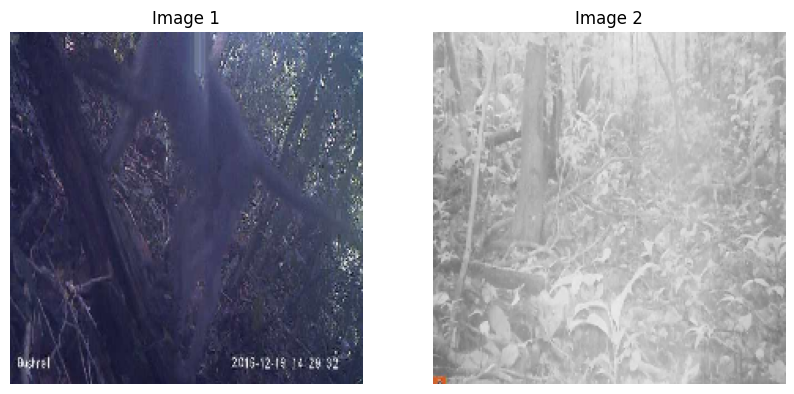

In [82]:
import matplotlib.pyplot as plt

# Retrieve a batch of images
images = next(train_split_generator)

# Display the first two images
plt.figure(figsize=(10, 5))

# Image 1
plt.subplot(1, 2, 1)
plt.imshow(images[0][0])
plt.title("Image 1")
plt.axis('off')

# Image 2
plt.subplot(1, 2, 2)
plt.imshow(images[0][1])
plt.title("Image 2")
plt.axis('off')

plt.show()


In [83]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt

# class ImageDataGeneratorWithPaths(ImageDataGenerator):
#     def flow_from_dataframe(self, *args, **kwargs):
#         base_generator = super().flow_from_dataframe(*args, **kwargs)
#         while True:
#             batch_data = next(base_generator)
#             indices = base_generator.index_array
#             filenames = [base_generator.filenames[i] for i in indices]
#             yield batch_data[0], batch_data[1], filenames

# test_datagen = ImageDataGeneratorWithPaths(
#     rescale=1./255,  # Rescale the image pixel values to [0,1]
# )

# # Flow from dataframe method to load images using the dataframe
# test_original_generator = test_datagen.flow_from_dataframe(
#     dataframe=test_values, 
#     x_col='filepath',
#     target_size=(224, 224),   
#     color_mode='rgb',
#     class_mode= None, 
#     batch_size=32,
#     shuffle=False,
#     seed=42
# )

# # Get a batch of images, labels, and filenames
# images, labels, filenames = next(test_original_generator)

# # Now, filenames contains the filenames of the images in the current batch
# print(filenames)

# # Display the first two images
# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.imshow(images[0])
# plt.title('Image 1')
# #plt.gca().set_aspect('equal', adjustable='box')

# # plt.subplot(1, 2, 2)
# # plt.imshow(images[1])
# # plt.title('Image 2')
# # plt.gca().set_aspect('equal', adjustable='box')

# plt.show()

### Confirm that the generators have the correct image size of (height,width) = (224, 224)

In [84]:
# import matplotlib.pyplot as plt

# # Get a batch of images and labels from the train generator
# images, labels = next(train_split_generator)

# # Print the shape, type of the images, and filepaths
# print("Images shape:", images.shape)
# print("Images type:", images.dtype)
# print("Filepaths:", train_split_generator.filenames[:2])  # Print the first two filepaths

# print(merged_train)

# # Display the first two images
# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.imshow(images[0])
# plt.title('Image 1')

# plt.subplot(1, 2, 2)
# plt.imshow(images[1])
# plt.title('Image 2')

# plt.show()

# # Do the same for the test generator
# images, labels = next(test_split_generator)
# print("Images shape:", images.shape)
# print("Images type:", images.dtype)
# print("Filepaths:", test_split_generator.filenames[:2])  # Print the first two filepaths

# # Display the first two images
# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.imshow(images[0])
# plt.title('Image 1')

# plt.subplot(1, 2, 2)
# plt.imshow(images[1])
# plt.title('Image 2')

# plt.show()

# **Model Development:**

## Model 1 of ResNet50. Score: 2.0596

In [85]:
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# # Load pre-trained ResNet50 model without the top layer
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Freeze the layers of the base model
# for layer in base_model.layers:
#     layer.trainable = False

# x = base_model.output # This line gets the output of the base_model (ResNet50 without the top layer) and uses it as the starting point for adding new layers.
# x = GlobalAveragePooling2D()(x)  # Add a global spatial average pooling layer
# x = Dense(1024, activation='relu')(x)  # Add a fully-connected layer
# predictions = Dense(8, activation='softmax')(x)  # Add a final output layer

# # This is the model we will train
# model = Model(inputs=base_model.input, outputs=predictions) # this model links the ResNetModel and the new layers to the prediction layer


# # compile model and set the metrics and loss 
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'categorical_crossentropy'])


# # fit model
# model.fit(train_split_generator, epochs=5, validation_data=test_split_generator)


# # create predictions
# predictions = model.predict(test_original_generator)

# # Create a DataFrame with predictions
# # Create a DataFrame with predictions
# prediction_df = pd.DataFrame(predictions, columns=['antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog', 'leopard', 'monkey_prosimian', 'rodent'])

# # Add the 'id' from the original test DataFrame's index
# prediction_df['id'] = test_values['id'] # id column from the original test set (test_values.csv)

# # Ensure 'id' is the first column
# prediction_df = prediction_df[['id'] + [col for col in prediction_df.columns if col != 'id']]

# # Save the DataFrame to a CSV file
# prediction_df.to_csv('submission_ResNet50_2.csv', index=False) # make sure to change file name to represent the model number
# print("Successfully submitted!")

# # 10 min for 5 epoch of no data augmentation. loss of 1.6907 in training and loss of 2.0124 in reality. shuffle = false for training
# # 11 min for 5 epoch of light change (20%) and horizontal flip. Loss of 1.7355 in training and loss of 2.0178 in reality. shuffle = false for training
# # 14 min for 5 epoch of light change (20%) and horizontal flip. Loss of 1.7255 in training and loss of 2.0195 in reality. shuffle = true for training
# # 13 min for 5 epoch of no data augmentation. Loss of 1.6750 in training and loss of 2.0061 in reality. shuffle = true for training


# # 387/387 [==============================] - 154s 390ms/step - loss: 1.9244 - accuracy: 0.2521 - categorical_crossentropy: 1.9244 - val_loss: 1.8092 - val_accuracy: 0.2857 - val_categorical_crossentropy: 1.8092
# # Epoch 2/5
# # 387/387 [==============================] - 144s 373ms/step - loss: 1.7773 - accuracy: 0.3056 - categorical_crossentropy: 1.7773 - val_loss: 1.7780 - val_accuracy: 0.2889 - val_categorical_crossentropy: 1.7780
# # Epoch 3/5
# # 387/387 [==============================] - 147s 381ms/step - loss: 1.7393 - accuracy: 0.3249 - categorical_crossentropy: 1.7393 - val_loss: 1.6986 - val_accuracy: 0.3362 - val_categorical_crossentropy: 1.6986
# # Epoch 4/5
# # 387/387 [==============================] - 153s 397ms/step - loss: 1.7081 - accuracy: 0.3318 - categorical_crossentropy: 1.7081 - val_loss: 1.7598 - val_accuracy: 0.2988 - val_categorical_crossentropy: 1.7598
# # Epoch 5/5
# # 387/387 [==============================] - 147s 380ms/step - loss: 1.6750 - accuracy: 0.3436 - categorical_crossentropy: 1.6750 - val_loss: 1.7103 - val_accuracy: 0.3335 - val_categorical_crossentropy: 1.7103
# # 140/140 [==============================] - 43s 302ms/step
# # Successfully submitted!

## Optuna tuning

In [86]:
import optuna
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def objective(trial):
    # Load the base pretrained model
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) # weights = 'imagenet' means that it's using pretrained weights. include_top determines whether or not the fully-connected output layers of the model should be included.
    # If include_top=False, the full model is loaded except for the output layers. This is useful if you want to fine-tune the model on a different task. By excluding the top layers, you can add your own output layers that are appropriate for your task.
    
    for layer in base_model.layers:
        layer.trainable = False
    
    # Add a new top layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(trial.suggest_int('units', 32, 1024), activation='relu')(x)
    predictions = Dense(8, activation='softmax')(x)

    # This is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=trial.suggest_float('lr', 1e-4, 1e-2, log=True)),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(train_split_generator, validation_data=valid_split_generator, epochs=5, verbose = 0) # verbose = 0 will not display the progress bar

    # Evaluate the model
    score = model.evaluate(test_split_generator, verbose=0)

    return score[1]  # Return validation accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=2)

# took 18 min with 2 trials and 5 epoch

# [I 2024-02-02 17:36:02,554] A new study created in memory with name: no-name-8e93bbe0-f12b-4063-a1bd-e96e0f8f6120
# /tmp/ipykernel_717/2967665033.py:25: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
#   model.compile(optimizer=Adam(lr=trial.suggest_loguniform('lr', 1e-4, 1e-2)),
# WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.
# Epoch 1/5
# 2024-02-02 17:36:06.130938: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
# 2024-02-02 17:36:07.375939: I external/local_xla/xla/service/service.cc:168] XLA service 0x55606bc6a5b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
# 2024-02-02 17:36:07.375980: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
# 2024-02-02 17:36:07.392655: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
# WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
# I0000 00:00:1706913367.505875    1478 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
# 362/362 [==============================] - 110s 295ms/step - loss: 1.9394 - accuracy: 0.2361 - val_loss: 1.8956 - val_accuracy: 0.2468
# Epoch 2/5
# 362/362 [==============================] - 99s 274ms/step - loss: 1.8068 - accuracy: 0.2937 - val_loss: 1.7982 - val_accuracy: 0.3042
# Epoch 3/5
# 362/362 [==============================] - 106s 292ms/step - loss: 1.7560 - accuracy: 0.3152 - val_loss: 1.7469 - val_accuracy: 0.3164
# Epoch 4/5
# 362/362 [==============================] - 107s 297ms/step - loss: 1.7170 - accuracy: 0.3262 - val_loss: 1.6725 - val_accuracy: 0.3542
# Epoch 5/5
# 362/362 [==============================] - 117s 323ms/step - loss: 1.6941 - accuracy: 0.3388 - val_loss: 1.6720 - val_accuracy: 0.3375
# [I 2024-02-02 17:45:24,421] Trial 0 finished with value: 0.3341463506221771 and parameters: {'units': 434, 'lr': 0.0024312122287096383}. Best is trial 0 with value: 0.3341463506221771.
# WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.
# Epoch 1/5
# 362/362 [==============================] - 96s 260ms/step - loss: 1.9440 - accuracy: 0.2457 - val_loss: 1.8002 - val_accuracy: 0.3160
# Epoch 2/5
# 362/362 [==============================] - 99s 274ms/step - loss: 1.7959 - accuracy: 0.3015 - val_loss: 1.7384 - val_accuracy: 0.3278
# Epoch 3/5
# 362/362 [==============================] - 102s 282ms/step - loss: 1.7605 - accuracy: 0.3094 - val_loss: 1.7890 - val_accuracy: 0.2981
# Epoch 4/5
# 362/362 [==============================] - 100s 275ms/step - loss: 1.7198 - accuracy: 0.3239 - val_loss: 1.6666 - val_accuracy: 0.3351
# Epoch 5/5
# 362/362 [==============================] - 110s 305ms/step - loss: 1.6861 - accuracy: 0.3376 - val_loss: 1.7233 - val_accuracy: 0.3217
# [I 2024-02-02 17:54:10,465] Trial 1 finished with value: 0.3178861737251282 and parameters: {'units': 969, 'lr': 0.008059458066605595}. Best is trial 0 with value: 0.3341463506221771.


[I 2024-02-02 17:36:02,554] A new study created in memory with name: no-name-8e93bbe0-f12b-4063-a1bd-e96e0f8f6120
/tmp/ipykernel_717/2967665033.py:25: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  model.compile(optimizer=Adam(lr=trial.suggest_loguniform('lr', 1e-4, 1e-2)),


Epoch 1/5


2024-02-02 17:36:06.130938: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-02-02 17:36:07.375939: I external/local_xla/xla/service/service.cc:168] XLA service 0x55606bc6a5b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-02 17:36:07.375980: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-02-02 17:36:07.392655: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1706913367.505875    1478 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


362/362 [==============================] - 110s 295ms/step - loss: 1.9394 - accuracy: 0.2361 - val_loss: 1.8956 - val_accuracy: 0.2468
Epoch 2/5
362/362 [==============================] - 99s 274ms/step - loss: 1.8068 - accuracy: 0.2937 - val_loss: 1.7982 - val_accuracy: 0.3042
Epoch 3/5
362/362 [==============================] - 106s 292ms/step - loss: 1.7560 - accuracy: 0.3152 - val_loss: 1.7469 - val_accuracy: 0.3164
Epoch 4/5
362/362 [==============================] - 107s 297ms/step - loss: 1.7170 - accuracy: 0.3262 - val_loss: 1.6725 - val_accuracy: 0.3542
Epoch 5/5
362/362 [==============================] - 117s 323ms/step - loss: 1.6941 - accuracy: 0.3388 - val_loss: 1.6720 - val_accuracy: 0.3375


[I 2024-02-02 17:45:24,421] Trial 0 finished with value: 0.3341463506221771 and parameters: {'units': 434, 'lr': 0.0024312122287096383}. Best is trial 0 with value: 0.3341463506221771.


Epoch 1/5
362/362 [==============================] - 96s 260ms/step - loss: 1.9440 - accuracy: 0.2457 - val_loss: 1.8002 - val_accuracy: 0.3160
Epoch 2/5
362/362 [==============================] - 99s 274ms/step - loss: 1.7959 - accuracy: 0.3015 - val_loss: 1.7384 - val_accuracy: 0.3278
Epoch 3/5
362/362 [==============================] - 102s 282ms/step - loss: 1.7605 - accuracy: 0.3094 - val_loss: 1.7890 - val_accuracy: 0.2981
Epoch 4/5
362/362 [==============================] - 100s 275ms/step - loss: 1.7198 - accuracy: 0.3239 - val_loss: 1.6666 - val_accuracy: 0.3351
Epoch 5/5
362/362 [==============================] - 110s 305ms/step - loss: 1.6861 - accuracy: 0.3376 - val_loss: 1.7233 - val_accuracy: 0.3217


[I 2024-02-02 17:54:10,465] Trial 1 finished with value: 0.3178861737251282 and parameters: {'units': 969, 'lr': 0.008059458066605595}. Best is trial 0 with value: 0.3341463506221771.


## Another thing to possibly try is to pick an even smaller 16:9 aspect ratio so that there is little to none upsampling (making images larger) 